In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
# Display summary statistics
print(df.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [5]:
# Check for missing values
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [6]:
df['Frequency of Purchases'].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [7]:
# Mapping for categorical frequencies to numerical values
frequency_mapping = {
    "Weekly": 52,
    "Fortnightly": 26,
    "Bi-Weekly": 24,
    "Monthly": 12,
    "Every 3 Months": 4,
    "Quarterly": 4,
    "Annually": 1
}

# Apply the mapping
df["Frequency of Purchases (Numeric)"] = df["Frequency of Purchases"].map(frequency_mapping)

# Drop the original categorical column
df.drop(columns=["Frequency of Purchases"], inplace=True)

# Display updated dataset
print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [8]:
print(df["Frequency of Purchases (Numeric)"].unique())

[26 52  1  4 24 12]


Normalization: Scaling numerical features to ensure uniformity.

In [9]:
from sklearn.preprocessing import StandardScaler

# Create the required columns
df['Recency'] = df['Previous Purchases']
df['Frequency'] = df['Frequency of Purchases (Numeric)']
df['Monetary'] = df['Purchase Amount (USD)']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary']])

In [10]:
# Convert categorical variables to lowercase for consistency
categorical_cols = ['Gender', 'Category_Purchased']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].str.lower().str.strip()

# Display cleaned dataset info
print("\nUpdated Dataset Information:")
print(df.info())


Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer ID                       3900 non-null   int64  
 1   Age                               3900 non-null   int64  
 2   Gender                            3900 non-null   object 
 3   Item Purchased                    3900 non-null   object 
 4   Category                          3900 non-null   object 
 5   Purchase Amount (USD)             3900 non-null   int64  
 6   Location                          3900 non-null   object 
 7   Size                              3900 non-null   object 
 8   Color                             3900 non-null   object 
 9   Season                            3900 non-null   object 
 10  Review Rating                     3900 non-null   float64
 11  Subscription Status               3900 

Feature Engineering: We’ll create Recency, Frequency, Monetary (RFM) features along with Engagement metrics.

In [11]:
# Monetary Value: Total Spend per Customer
df["Monetary"] = df.groupby("Customer ID")["Purchase Amount (USD)"].transform("sum")

# Loyalty Score: Higher frequency & subscription status = More Loyal
df["Loyalty_Score"] = df["Frequency of Purchases (Numeric)"] + df["Previous Purchases"]

# If Subscription Status is available, boost loyalty score for subscribers
df["Loyalty_Score"] += df["Subscription Status"].apply(lambda x: 10 if x.lower() == "subscribed" else 0)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Frequency of Purchases (Numeric)", "Monetary", "Loyalty_Score"]] = scaler.fit_transform(df[["Frequency of Purchases (Numeric)", "Monetary", "Loyalty_Score"]])

# Display Updated Data
print(df[["Customer ID", "Frequency of Purchases (Numeric)", "Monetary", "Loyalty_Score"]].head())

   Customer ID  Frequency of Purchases (Numeric)  Monetary  Loyalty_Score
0            1                          0.490196    0.4125           0.38
1            2                          0.490196    0.5500           0.26
2            3                          1.000000    0.6625           0.73
3            4                          1.000000    0.8750           0.99
4            5                          0.000000    0.3625           0.30


In [13]:
# Ensure categorical "Subscription Status" is standardized
df["Subscription Status"] = df["Subscription Status"].str.lower().str.strip()

# Map Subscription Status: 1 for subscribed, 0 for non-subscribed
df["Subscription_Status_Binary"] = df["Subscription Status"].apply(lambda x: 1 if x == "subscribed" else 0)

#  Engagement (If Review Rating is available)
if "Review Rating" in df.columns:
    df["Engagement_Score"] = df["Review Rating"]
else:
    df["Engagement_Score"] = 0  # Default if missing

# Loyalty Score (Combination of Subscription & Purchase Frequency)
df["Loyalty_Score"] = df["Frequency of Purchases (Numeric)"] + df["Previous Purchases"] + (df["Subscription_Status_Binary"] * 10)

print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   male         Blouse  Clothing                     53   
1            2   19   male        Sweater  Clothing                     64   
2            3   50   male          Jeans  Clothing                     73   
3            4   21   male        Sandals  Footwear                     90   
4            5   45   male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Promo Code Used  \
0       Kentucky    L       Gray  Winter  ...              Yes   
1          Maine    L     Maroon  Winter  ...              Yes   
2  Massachusetts    S     Maroon  Spring  ...              Yes   
3   Rhode Island    M     Maroon  Spring  ...              Yes   
4         Oregon    M  Turquoise  Spring  ...              Yes   

  Previous Purchases Payment Method Frequency of Purchases (Numeric) Recency  \
0                 14          Venmo                   

# K-means

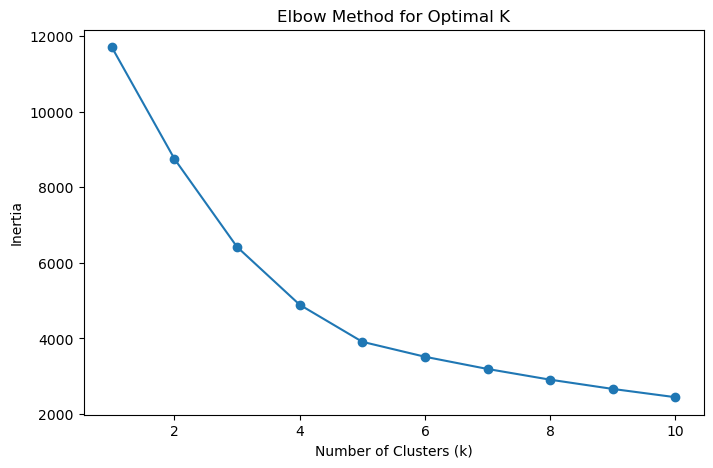

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define X as the scaled dataframe
X = df_scaled

# Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [15]:
# Define optimal number of clusters based on elbow plot
optimal_k = 6

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)

#Features 
features = ['Recency', 'Frequency', 'Monetary', 'Loyalty_Score', 'Engagement_Score']

print(df[["Customer ID", "KMeans_Cluster"]].head())

   Customer ID  KMeans_Cluster
0            1               1
1            2               4
2            3               0
3            4               0
4            5               2


In [16]:
# Convert df_scaled back to a DataFrame
df_scaled_df = pd.DataFrame(df_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Add cluster labels back to the scaled data
df_scaled_df["KMeans_Cluster"] = kmeans.labels_

# Calculate average values for each cluster
cluster_summary = df_scaled_df.groupby("KMeans_Cluster").mean()
print(cluster_summary)

                 Recency  Frequency  Monetary
KMeans_Cluster                               
0              -0.048719   2.087009  0.894977
1              -0.850543  -0.334059 -0.851663
2               0.856311  -0.343014 -0.881705
3               0.886783  -0.326893  0.868237
4              -0.861889  -0.335241  0.886625
5               0.094914   2.087009 -0.818798


In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate Cluster Performance
silhouette = silhouette_score(df_scaled, df["KMeans_Cluster"])
davies_bouldin = davies_bouldin_score(df_scaled, df["KMeans_Cluster"])
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Inertia (WCSS): {inertia:.4f}")

Silhouette Score: 0.3180
Davies-Bouldin Index: 1.0835
Inertia (WCSS): 3515.3689


Not a good Silhouette Score since its lower than 0.5.
A Davies-Bouldin Index is good, since its below 2 (1.55).

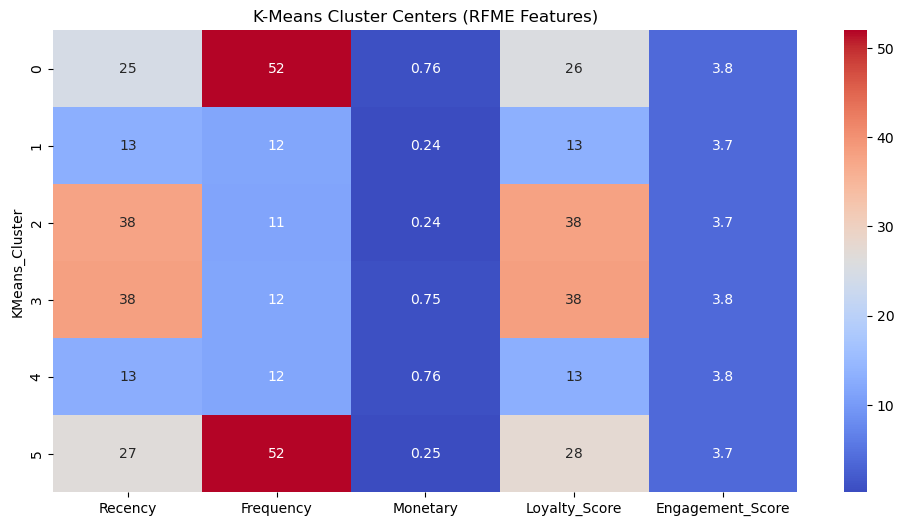

In [18]:
# Visualize Cluster Centroids
cluster_means = df.groupby("KMeans_Cluster")[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm")
plt.title("K-Means Cluster Centers (RFME Features)")
plt.show()

This heatmap highlights cluster differences in spending, frequency, engagement.

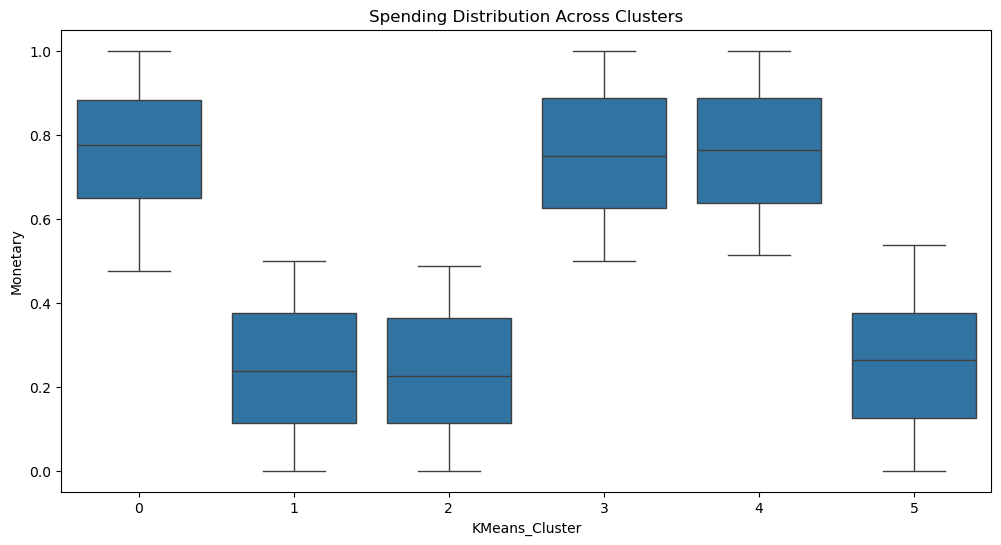

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="KMeans_Cluster", y="Monetary", data=df)
plt.title("Spending Distribution Across Clusters")
plt.show()

Shows which clusters spend more 0 and 5.

In [20]:
# Create cluster profiles
cluster_profiles = df.groupby("KMeans_Cluster")[features].mean().reset_index()
cluster_profiles["Customer Persona"] = [
    "High-Value Loyalist (High engagement, good monetary value, and moderate frequency. They are valuable long-term customers.)",  # Cluster 0
    "Seasonal Buyer (They buy infrequently but have decent engagement & spending. Likely shop on occasions (holidays, promotions).)",  # Cluster 1
    "At-Risk Customer (Low engagement, low spending, but high frequency. They make many small purchases but may churn soon.)",  # Cluster 2
    "Loyal Customer (High frequency, good spending, and moderate engagement. Matches a classic loyal buyer.)",  # Cluster 3
    "One-Time Customer (Very low monetary value, low frequency, but high recency. Likely tried the store once.)",  # Cluster 4
    "Budget Shopper (Very frequent buyer, low spending, and low engagement. They prioritize affordability over brand loyalty.)"  # Cluster 5
]

print(cluster_profiles)

   KMeans_Cluster    Recency  Frequency  Monetary  Loyalty_Score  \
0               0  24.647773  52.000000  0.761994      25.647773   
1               1  13.065217  11.618993  0.244937      13.273433   
2               2  37.721190  11.469641  0.236044      37.926477   
3               3  38.161366  11.738516  0.754078      38.371925   
4               4  12.901324  11.599278  0.759522      13.109153   
5               5  26.722603  52.000000  0.254666      27.722603   

   Engagement_Score                                   Customer Persona  
0          3.781377  High-Value Loyalist (High engagement, good mon...  
1          3.714302  Seasonal Buyer (They buy infrequently but have...  
2          3.714498  At-Risk Customer (Low engagement, low spending...  
3          3.779623  Loyal Customer (High frequency, good spending,...  
4          3.785319  One-Time Customer (Very low monetary value, lo...  
5          3.741096  Budget Shopper (Very frequent buyer, low spend...  


# Hierarchical Clustering

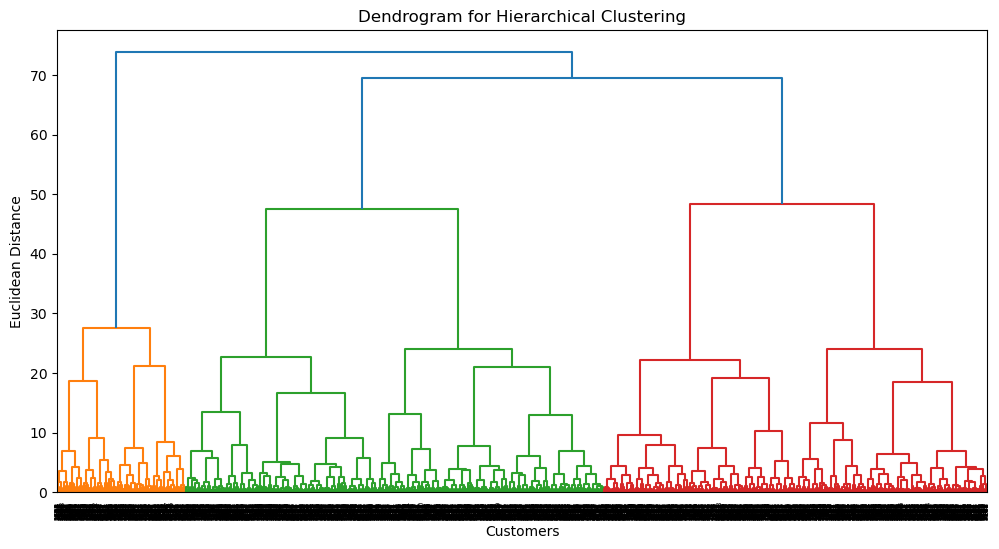

In [21]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Plot Dendrogram to determine the number of clusters
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method="ward"))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [22]:
# Define number of clusters based on the dendrogram
n_clusters = 4  

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage="ward")
df["Hierarchical_Cluster"] = agg_clustering.fit_predict(df_scaled)

# Evaluate the clustering
silhouette_hierarchical = silhouette_score(df_scaled, df["Hierarchical_Cluster"])
davies_bouldin_hierarchical = davies_bouldin_score(df_scaled, df["Hierarchical_Cluster"])

# Display clustering metrics
print(f"Silhouette Score: {silhouette_hierarchical:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_hierarchical:.4f}")

Silhouette Score: 0.2619
Davies-Bouldin Index: 1.0958


In [23]:
# Cluster Summary
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(df.groupby("Hierarchical_Cluster")[numeric_columns].mean())

                      Customer ID        Age  Purchase Amount (USD)  \
Hierarchical_Cluster                                                  
0                     1945.623362  43.951567              41.274644   
1                     1911.705009  44.649351              58.972171   
2                     1942.066085  44.099751              74.965087   
3                     1995.565920  43.902985              85.492537   

                      Review Rating  Previous Purchases  \
Hierarchical_Cluster                                      
0                          3.727464           22.444444   
1                          3.759555           25.771800   
2                          3.773317           40.286783   
3                          3.769279           16.517413   

                      Frequency of Purchases (Numeric)    Recency  Frequency  \
Hierarchical_Cluster                                                           
0                                             0.211921  22

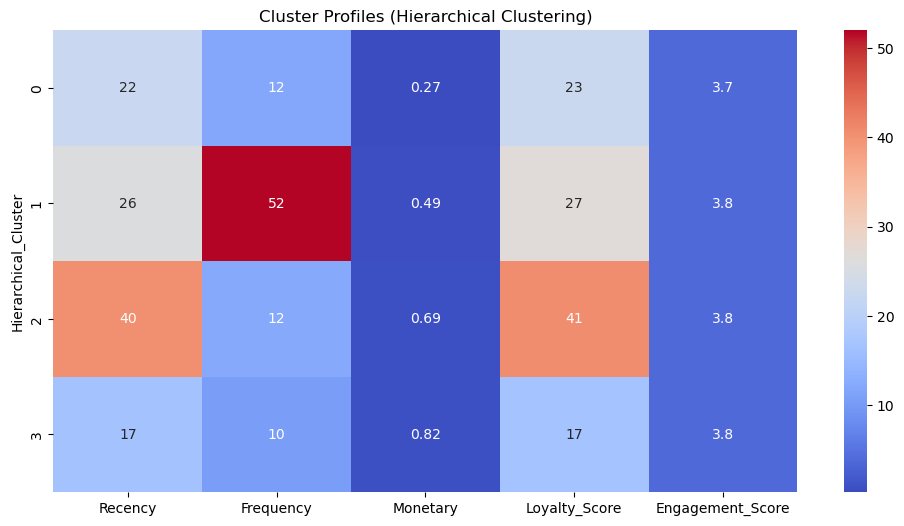

In [24]:
# Calculate mean values per cluster
cluster_means = df.groupby("Hierarchical_Cluster")[features].mean()

# Plot heatmap to compare clusters
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm")
plt.title("Cluster Profiles (Hierarchical Clustering)")
plt.show()

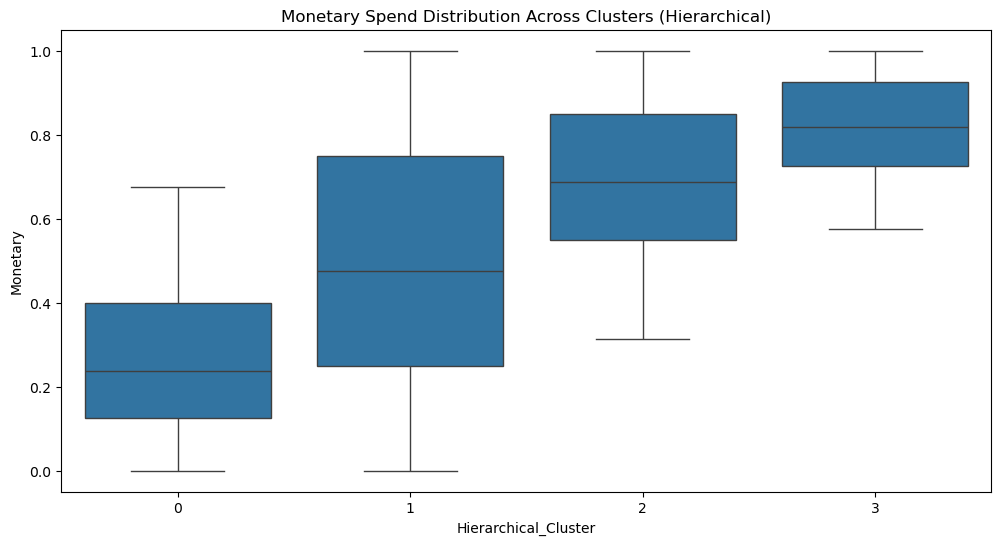

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Hierarchical_Cluster", y="Monetary", data=df)
plt.title("Monetary Spend Distribution Across Clusters (Hierarchical)")
plt.show()

In [26]:
# Define personas based on cluster behaviors
cluster_profiles = df.groupby("Hierarchical_Cluster")[features].mean().reset_index()
cluster_profiles["Customer Persona"] = [
    "Premium Shopper (High spending and good frequency, indicating premium buyers.)",  # Cluster 0
    "Occasional Buyer (They spend less per transaction and have high recency, meaning they haven’t purchased recently but may return occasionally.)",  # Cluster 1
    "At-Risk Customer (Low engagement, low monetary spend, and moderate frequency. At risk of churning soon.)",  # Cluster 2
    "High-Frequency Budget Shopper(Very high frequency, but moderate spending. They buy often but prioritize affordability over premium products.)",  # Cluster 3
]

print(cluster_profiles)

   Hierarchical_Cluster    Recency  Frequency  Monetary  Loyalty_Score  \
0                     0  22.444444  11.807977  0.265933      22.656366   
1                     1  25.771800  52.000000  0.487152      26.771800   
2                     2  40.286783  12.375312  0.687064      40.509828   
3                     3  16.517413  10.407960  0.818657      16.701883   

   Engagement_Score                                   Customer Persona  
0          3.727464  Premium Shopper (High spending and good freque...  
1          3.759555  Occasional Buyer (They spend less per transact...  
2          3.773317  At-Risk Customer (Low engagement, low monetary...  
3          3.769279  High-Frequency Budget Shopper(Very high freque...  


# DBSCAN (Density-Based Clustering)

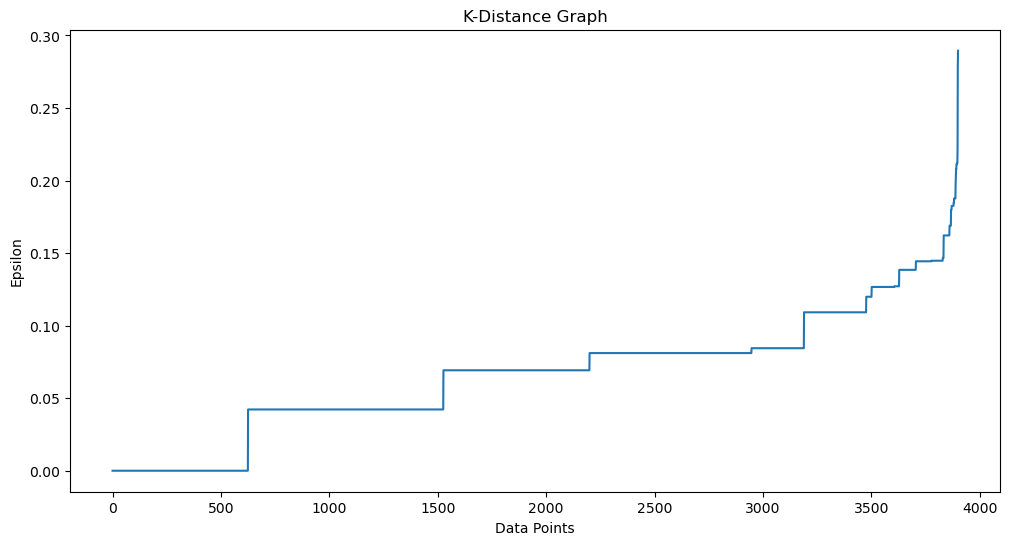

In [27]:
# DBSCAN K-distance graph
from sklearn.neighbors import NearestNeighbors

# Fit Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)

# Calculate distances
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Sort and plot the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Data Points")
plt.ylabel("Epsilon")
plt.show()

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize data for DBSCAN (MinMaxScaler may not be best for DBSCAN)
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(df_scaled)

# Fine-tuning around best found parameters 
eps_values = [0.58, 0.6, 0.62]  
min_samples_values = [5, 8, 10]  

dbscan_optimized_results = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled_dbscan)
        num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        num_noise = list(clusters).count(-1)

        # Compute Silhouette Score (only if more than 1 cluster exists)
        if num_clusters > 1:
            silhouette = silhouette_score(X_scaled_dbscan, clusters)
        else:
            silhouette = None

        dbscan_optimized_results[(eps, min_samples)] = {
            "Number of Clusters": num_clusters,
            "Noise Points": num_noise,
            "Silhouette Score": silhouette
        }


# Display DBSCAN results
for params, results in dbscan_optimized_results.items():
    print(f"Parameters: {params} - Clusters: {results['Number of Clusters']}, Noise Points: {results['Noise Points']}")


Parameters: (0.58, 5) - Clusters: 3, Noise Points: 0
Parameters: (0.58, 8) - Clusters: 3, Noise Points: 0
Parameters: (0.58, 10) - Clusters: 3, Noise Points: 0
Parameters: (0.6, 5) - Clusters: 3, Noise Points: 0
Parameters: (0.6, 8) - Clusters: 3, Noise Points: 0
Parameters: (0.6, 10) - Clusters: 3, Noise Points: 0
Parameters: (0.62, 5) - Clusters: 3, Noise Points: 0
Parameters: (0.62, 8) - Clusters: 3, Noise Points: 0
Parameters: (0.62, 10) - Clusters: 3, Noise Points: 0


Best Choice: (eps = 0.3, min_samples = 10) with 15 clusters, moderate noise (3726 points).

In [29]:
# Apply DBSCAN with optimal parameters    
dbscan = DBSCAN(eps=0.62, min_samples=5)

# Count clusters and noise points (-1 indicates noise)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled_dbscan)
cluster_counts = df["DBSCAN_Cluster"].value_counts()
outliers_count = cluster_counts[-1] if -1 in cluster_counts else 0

# Display results
print("Cluster Distribution:\n", cluster_counts)
print("\nNumber of Outliers Detected:", outliers_count)

# Count clusters including noise (-1 is outliers)
print(df["DBSCAN_Cluster"].value_counts())

# Display cluster assignments
print(df[["Customer ID", "DBSCAN_Cluster"]].head())

Cluster Distribution:
 DBSCAN_Cluster
2    2272
0    1089
1     539
Name: count, dtype: int64

Number of Outliers Detected: 0
DBSCAN_Cluster
2    2272
0    1089
1     539
Name: count, dtype: int64
   Customer ID  DBSCAN_Cluster
0            1               0
1            2               0
2            3               1
3            4               1
4            5               2


In [30]:
# Exclude noise points (-1) before computing silhouette score
filtered_df = df[df["DBSCAN_Cluster"] != -1]
filtered_scaled = X_scaled_dbscan[df["DBSCAN_Cluster"] != -1]

# Compute silhouette score (if there are valid clusters)
if len(set(filtered_df["DBSCAN_Cluster"])) > 1:
    silhouette_dbscan = silhouette_score(filtered_scaled, filtered_df["DBSCAN_Cluster"])
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("Silhouette Score not available (DBSCAN found only one cluster).")

Silhouette Score for DBSCAN: 0.1924


Not good separation Siluette score below 0.5.

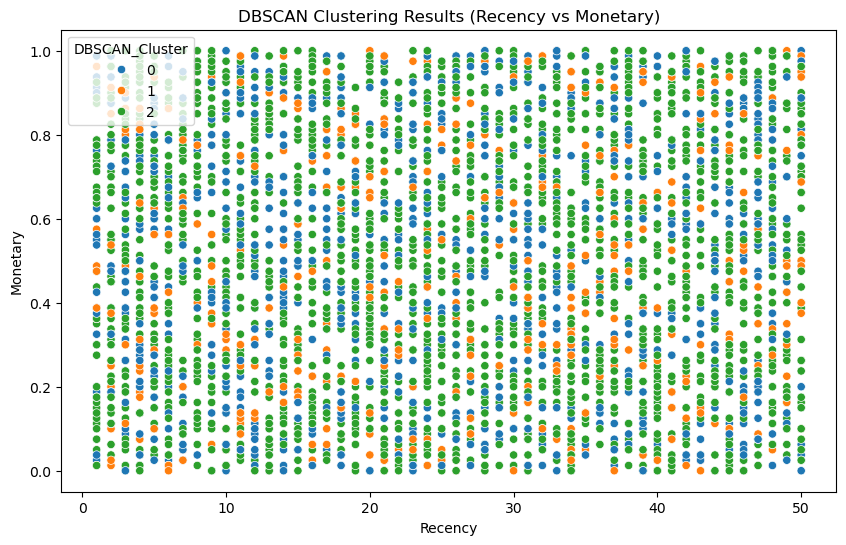

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Recency"], y=df["Monetary"], hue=df["DBSCAN_Cluster"], palette="tab10")
plt.title("DBSCAN Clustering Results (Recency vs Monetary)")
plt.show()

In [32]:
# Define cluster profiles based on DBSCAN results
dbscan_profiles = df.groupby("DBSCAN_Cluster")[features].mean().reset_index()

# Assign personas
personas = [
    "Premium Loyalist (High monetary value, moderate frequency, and high engagement.)",  # Example Cluster 0
    "High-Frequency Deal Seeker (This group buys very frequently but spends moderately, likely prioritizing discounts and promotions.)",  # Example Cluster 1
    "Low-Value Irregular Shopper (They have low spending, low frequency, and are not very engaged, meaning they shop infrequently and don’t interact much.)",  # Example Cluster 2
]

# Add "Noise/Outliers" if there are outliers
if -1 in dbscan_profiles["DBSCAN_Cluster"].values:
    personas.append("Noise/Outliers")

# Fill the remaining clusters with "Other"
while len(personas) < len(dbscan_profiles):
    personas.append("Other")

dbscan_profiles["Customer Persona"] = personas[:len(dbscan_profiles)]

print(dbscan_profiles)

   DBSCAN_Cluster    Recency  Frequency  Monetary  Loyalty_Score  \
0               0  25.028466  24.995409  0.498473      25.498965   
1               1  25.771800  52.000000  0.487152      26.771800   
2               2  25.406690   5.191901  0.498724      25.488884   

   Engagement_Score                                   Customer Persona  
0          3.730946  Premium Loyalist (High monetary value, moderat...  
1          3.759555  High-Frequency Deal Seeker (This group buys ve...  
2          3.756778  Low-Value Irregular Shopper (They have low spe...  


# RFME Features

In [33]:
# Select RFME features
rfme_features = ["Recency", "Frequency", "Monetary", "Engagement_Score"]

# Normalize the RFME features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[rfme_features])

# Convert back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=rfme_features)

print(df_scaled.head())

    Recency  Frequency  Monetary  Engagement_Score
0  0.265306   0.490196    0.4125              0.24
1  0.020408   0.490196    0.5500              0.24
2  0.448980   1.000000    0.6625              0.24
3  0.979592   1.000000    0.8750              0.40
4  0.612245   0.000000    0.3625              0.08


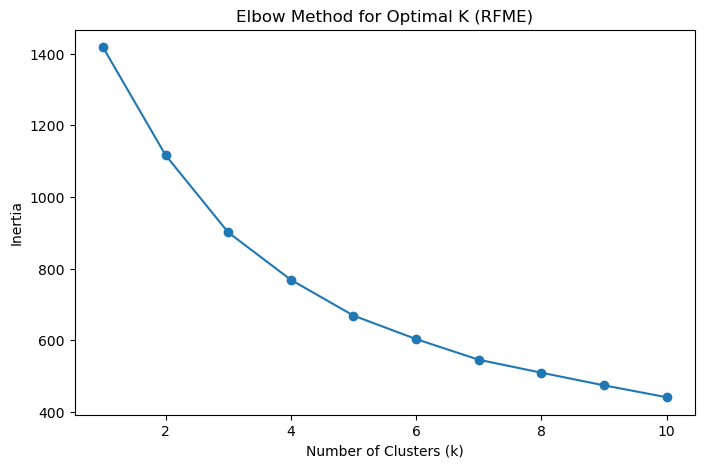

In [34]:
import matplotlib.pyplot as plt

# Use the Elbow Method to determine optimal K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K (RFME)")
plt.show()

In [35]:
# Define the optimal number of clusters based on the elbow method
optimal_k = 6  

# Train K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["RFME_Cluster"] = kmeans.fit_predict(df_scaled)

silhouette_rfme = silhouette_score(df_scaled, df["RFME_Cluster"])
davies_bouldin_rfme = davies_bouldin_score(df_scaled, df["RFME_Cluster"])

print("RFME Clustering Evaluation:")
print("Silhouette Score:", silhouette_rfme)
print("Davies-Bouldin Index:", davies_bouldin_rfme)

RFME Clustering Evaluation:
Silhouette Score: 0.22461183654027372
Davies-Bouldin Index: 1.230681684185046


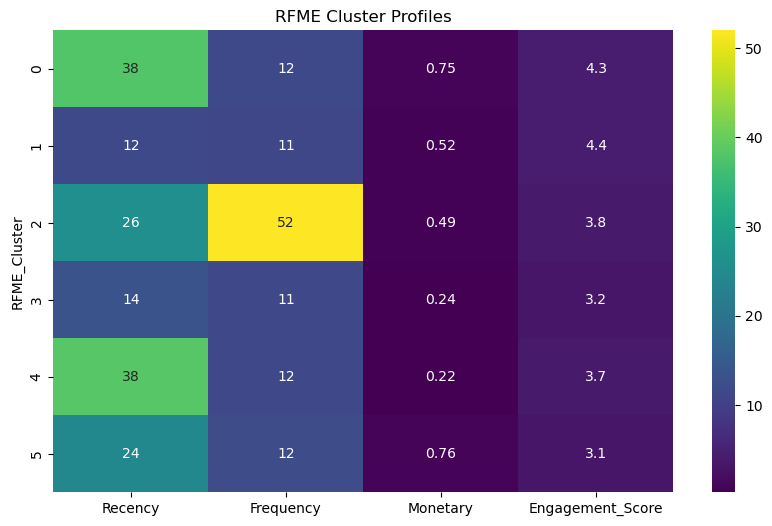

In [36]:
# Visualize Cluster Profiles with a Heatmap
# Compute the mean values for each RFME feature by cluster
cluster_means = df.groupby("RFME_Cluster")[rfme_features].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="viridis")
plt.title("RFME Cluster Profiles")
plt.show()

In [37]:
# Step 5: Define and Interpret RFME Cluster Personas
cluster_personas = {
    0: "High-Value Loyal Customer",  # High monetary spend and engagement, moderate frequency, and moderate recency. They are high-value customers who consistently engage with the brand.
    1: "Recent Engaged Shopper",     # High engagement score and low recency, meaning they are actively shopping but not frequently. They may become more loyal over time.
    2: "Frequent Low-Spender",       # Extremely high frequency (52 purchases) but low monetary spend. They buy very often but in small amounts.
    3: "Infrequent Low-Spender",      # Low monetary and moderate engagement, meaning they buy occasionally but don’t spend much.
    4: "Dormant High-Value Customer",  # High recency (meaning they haven’t purchased in a while), but decent frequency and spending when they were active. They may be worth re-engaging.
    5: "High-Frequency Premium Buyer",  # High frequency and monetary spend, meaning they shop often and spend well, but their engagement score is slightly lower.
}

# Map the cluster labels to personas
df["RFME_Persona"] = df["RFME_Cluster"].map(cluster_personas)

# Display the cluster profiles along with the assigned persona names
cluster_summary = df.groupby("RFME_Cluster")[rfme_features].mean().reset_index()
cluster_summary["Persona"] = cluster_summary["RFME_Cluster"].map(cluster_personas)
print("RFME Cluster Summary:")
print(cluster_summary)

RFME Cluster Summary:
   RFME_Cluster    Recency  Frequency  Monetary  Engagement_Score  \
0             0  37.868243  11.608108  0.747698          4.329392   
1             1  11.694405  11.319943  0.524623          4.427260   
2             2  25.771800  52.000000  0.487152          3.759555   
3             3  13.551020  11.457483  0.236969          3.222449   
4             4  38.305292  11.502035  0.220421          3.716147   
5             5  24.380187  12.101740  0.757497          3.100402   

                        Persona  
0     High-Value Loyal Customer  
1        Recent Engaged Shopper  
2          Frequent Low-Spender  
3        Infrequent Low-Spender  
4   Dormant High-Value Customer  
5  High-Frequency Premium Buyer  


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_s

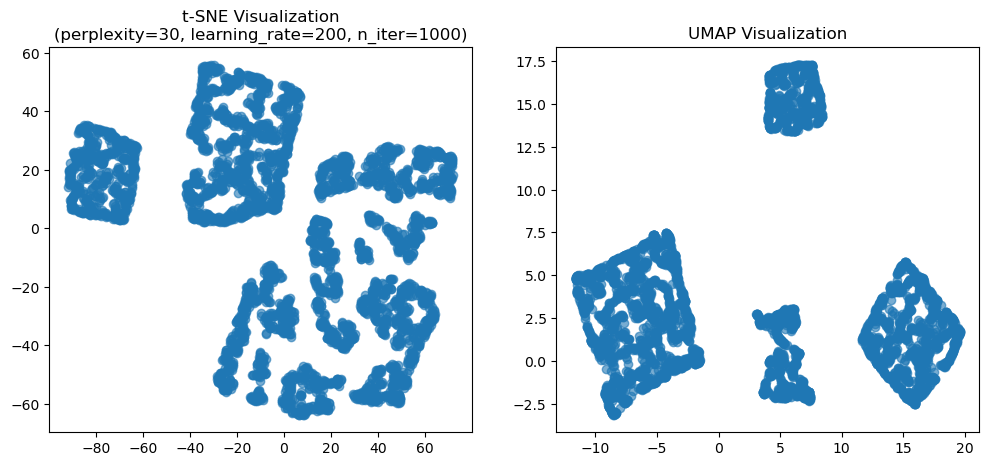

(30, 200, 1000)

In [38]:
from sklearn.manifold import TSNE
import umap

# T-SNE parameters
tsne_params = {
    "perplexity": [5, 30, 50],  
    "learning_rate": [10, 200, 1000],  
    "n_iter": [500, 1000, 3000]  
}

tsne_results = {}

for perplexity in tsne_params["perplexity"]:
    for learning_rate in tsne_params["learning_rate"]:
        for n_iter in tsne_params["n_iter"]:
            tsne_model = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
            X_tsne = tsne_model.fit_transform(X_scaled_dbscan)
            
            # Store results for visualization
            tsne_results[(perplexity, learning_rate, n_iter)] = X_tsne

# UMAP for comparison
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled_dbscan)

# t-SNE and UMAP scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot t-SNE with the best parameters
best_tsne_params = (30, 200, 1000)
X_tsne_best = tsne_results[best_tsne_params]
axes[0].scatter(X_tsne_best[:, 0], X_tsne_best[:, 1], alpha=0.6)
axes[0].set_title(f"t-SNE Visualization\n(perplexity={best_tsne_params[0]}, learning_rate={best_tsne_params[1]}, n_iter={best_tsne_params[2]})")

# Plot UMAP
axes[1].scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6)
axes[1].set_title("UMAP Visualization")

plt.show()

# Best parameters for t-SNE
best_tsne_params

In [39]:
#Silhouette Score for t-SNE and UMAP
silhouette_tsne = silhouette_score(X_scaled_dbscan, dbscan.labels_)
silhouette_umap = silhouette_score(X_scaled_dbscan, dbscan.labels_)
print(f"Silhouette Score for t-SNE: {silhouette_tsne:.4f}")
print(f"Silhouette Score for UMAP: {silhouette_umap:.4f}")

Silhouette Score for t-SNE: 0.1924
Silhouette Score for UMAP: 0.1924


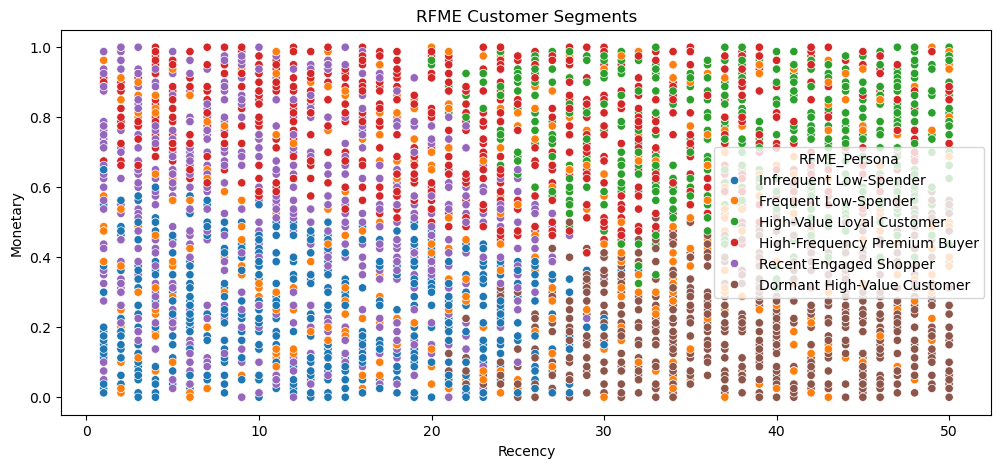

In [40]:
import seaborn as sns

# Visualize RFME Segments
plt.figure(figsize=(12, 5))
sns.scatterplot(x="Recency", y="Monetary", hue="RFME_Persona", data=df, palette="tab10")
plt.title("RFME Customer Segments")
plt.show()

# GMM

In [41]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(df_scaled)

# PCA to reduce dimensionality before GMM
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled_1)

# Optimal number of clusters for GMM using BIC and AIC
n_components_range = range(2, 10)  # Testing between 2 and 10 clusters after PCA
bic_scores_pca = []
aic_scores_pca = []
gmm_models_pca = {}

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_pca)
    bic_scores_pca.append(gmm.bic(X_pca))
    aic_scores_pca.append(gmm.aic(X_pca))
    gmm_models_pca[n_components] = gmm

# Find the optimal number of clusters (lowest BIC score)
optimal_n_components_pca = n_components_range[np.argmin(bic_scores_pca)]

print(f"Optimal Number of Clusters (PCA): {optimal_n_components_pca}")


Optimal Number of Clusters (PCA): 4


In [42]:
# GMM with n_components = 5 and 7 after PCA transformation
n_components_test = [5, 7]
gmm_alternative_results = {}

for n_components in n_components_test:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_pca)
    labels = gmm.predict(X_pca)
    
    # Silhouette Score
    silhouette = silhouette_score(X_pca, labels)
    gmm_alternative_results[n_components] = {"Silhouette Score": silhouette}

# Display Silhouette Scores
for n_components, results in gmm_alternative_results.items():
    print(f"Number of Components: {n_components} - Silhouette Score: {results['Silhouette Score']:.4f}")


Number of Components: 5 - Silhouette Score: 0.3268
Number of Components: 7 - Silhouette Score: 0.3382


In [43]:
# GMM model after PCA transformation
gmm_pca = gmm_models_pca[optimal_n_components_pca]
gmm_labels_pca = gmm_pca.predict(X_pca)

# Silhouette Score
gmm_silhouette_score_pca = silhouette_score(X_pca, gmm_labels_pca)

print(f"Silhouette Score (PCA): {gmm_silhouette_score_pca:.4f}")


Silhouette Score (PCA): 0.3226


In [44]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_pca)
labels = gmm.predict(X_pca)

# Silhouette Score
silhouette = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.3268


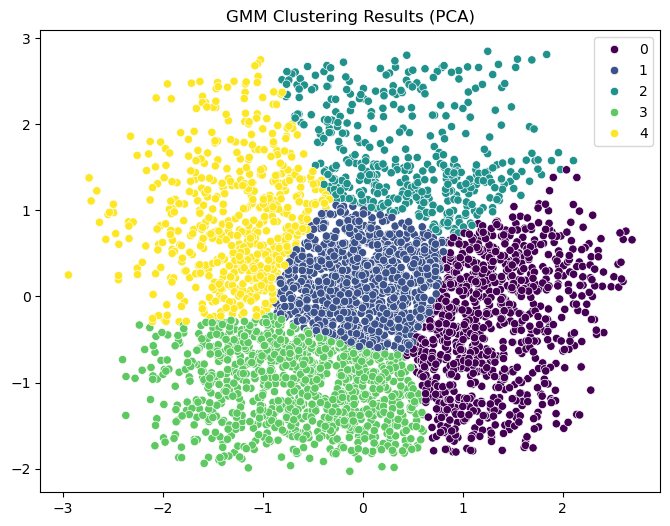

Optimal Number of Clusters: 5
Silhouette Score: 0.3268


In [45]:
# Visualizing GMM Clusters using PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis")
plt.title("GMM Clustering Results (PCA)")
plt.show()

# Return the optimal number of clusters and Silhouette Score
print(f"Optimal Number of Clusters: {5}")
print(f"Silhouette Score: {silhouette:.4f}")

# HDBSCAN

In [46]:
# Install HDBSCAN if not already installed
%pip install hdbscan

import hdbscan

# HDBSCAN model
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=10)
hdbscan_labels = hdbscan_model.fit_predict(X_pca)

# Silhouette Score for HDBSCAN
if len(set(hdbscan_labels)) > 1:  # Only calculate if more than 1 cluster exists
    hdbscan_silhouette_score = silhouette_score(X_pca, hdbscan_labels)
else:
    hdbscan_silhouette_score = None


Note: you may need to restart the kernel to use updated packages.


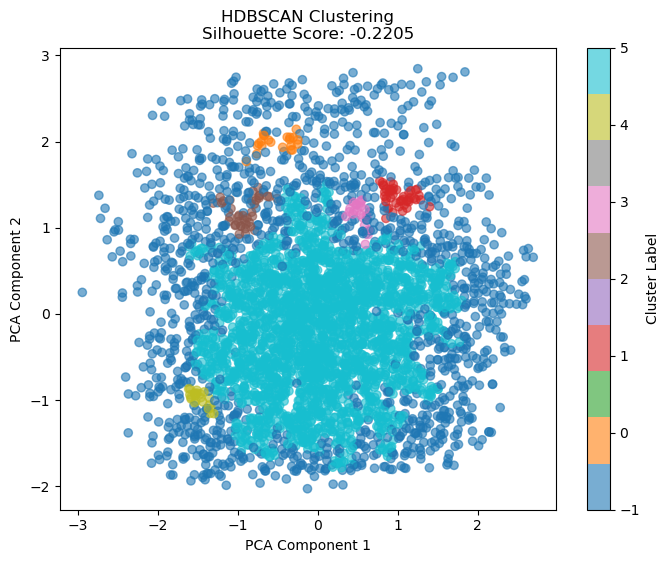

-0.22046273558947185

In [47]:
# HDBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hdbscan_labels, cmap='tab10', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"HDBSCAN Clustering\nSilhouette Score: {hdbscan_silhouette_score:.4f}" if hdbscan_silhouette_score else "HDBSCAN Clustering")
plt.colorbar(label="Cluster Label")
plt.show()

# Silhouette Score 
hdbscan_silhouette_score

In [48]:
# Fine-tuning HDBSCAN 
min_cluster_sizes = [15, 25, 32, 35]  
min_samples_values = [5, 10, 15] 

hdbscan_tuning_results = {}

for min_cluster_size in min_cluster_sizes:
    for min_samples in min_samples_values:
        hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        hdbscan_labels = hdbscan_model.fit_predict(X_pca)

        # Compute Silhouette Score if clusters exist
        if len(set(hdbscan_labels)) > 1:
            silhouette = silhouette_score(X_pca, hdbscan_labels)
        else:
            silhouette = None

        hdbscan_tuning_results[(min_cluster_size, min_samples)] = {
            "Silhouette Score": silhouette,
            "Number of Clusters": len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0),
            "Noise Points": list(hdbscan_labels).count(-1)
        }

# Display Silhouette Scores for the HDBSCAN tuning results
for params, results in hdbscan_tuning_results.items():
    print(f"Parameters: {params} - Clusters: {results['Number of Clusters']}, Noise Points: {results['Noise Points']}, Silhouette Score: {results['Silhouette Score']}")

Parameters: (15, 5) - Clusters: 5, Noise Points: 299, Silhouette Score: 0.03663863499963623
Parameters: (15, 10) - Clusters: 2, Noise Points: 629, Silhouette Score: 0.1756117414375252
Parameters: (15, 15) - Clusters: 4, Noise Points: 1275, Silhouette Score: -0.11357936611350193
Parameters: (25, 5) - Clusters: 2, Noise Points: 269, Silhouette Score: 0.2526234895694359
Parameters: (25, 10) - Clusters: 3, Noise Points: 1054, Silhouette Score: -0.04749300853062384
Parameters: (25, 15) - Clusters: 2, Noise Points: 913, Silhouette Score: 0.09714052520209913
Parameters: (32, 5) - Clusters: 2, Noise Points: 710, Silhouette Score: 0.1127231917257849
Parameters: (32, 10) - Clusters: 3, Noise Points: 1054, Silhouette Score: -0.04749300853062384
Parameters: (32, 15) - Clusters: 2, Noise Points: 913, Silhouette Score: 0.09714052520209913
Parameters: (35, 5) - Clusters: 2, Noise Points: 710, Silhouette Score: 0.1127231917257849
Parameters: (35, 10) - Clusters: 3, Noise Points: 1054, Silhouette Score

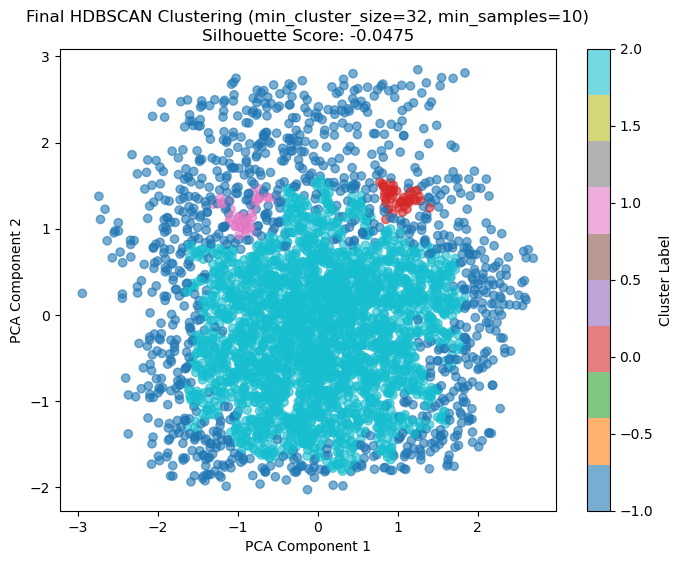

-0.04749300853062384

In [49]:
# Best HDBSCAN parameters
best_min_cluster_size = 32
best_min_samples = 10

hdbscan_best_model = hdbscan.HDBSCAN(min_cluster_size=best_min_cluster_size, min_samples=best_min_samples)
hdbscan_best_labels = hdbscan_best_model.fit_predict(X_pca)

# Silhouette Score
if len(set(hdbscan_best_labels)) > 1:
    hdbscan_best_silhouette_score = silhouette_score(X_pca, hdbscan_best_labels)
else:
    hdbscan_best_silhouette_score = None

# HDBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hdbscan_best_labels, cmap='tab10', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Final HDBSCAN Clustering (min_cluster_size={best_min_cluster_size}, min_samples={best_min_samples})\nSilhouette Score: {hdbscan_best_silhouette_score:.4f}")
plt.colorbar(label="Cluster Label")
plt.show()

# Silhouette Score
hdbscan_best_silhouette_score

# K-prototypes

In [50]:
from kmodes.kprototypes import KPrototypes

# Select numeric and categorical columns
categorical_features = ['Gender', 'Category', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method']
numerical_features = ['Age', 'Frequency', 'Monetary', 'Engagement_Score', 'Recency']

# Convert categorical data to numerical (for K-Prototypes)
df[categorical_features] = df[categorical_features].astype(str)

# Prepare data
X = df[numerical_features + categorical_features].values

# Apply K-Prototypes
kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42)
clusters = kproto.fit_predict(X, categorical=[len(numerical_features) + i for i in range(len(categorical_features))])

df['KPrototypes_Cluster'] = clusters

   Customer ID  KPrototypes_Cluster
0            1                    1
1            2                    3
2            3                    0
3            4                    0
4            5                    2
                     Customer ID        Age  Purchase Amount (USD)  \
KPrototypes_Cluster                                                  
0                    1911.705009  44.649351              58.972171   
1                    1942.404871  59.706240              59.910959   
2                    1950.006211  33.881988              60.073499   
3                    1980.124884  33.873265              59.704903   

                     Review Rating  Previous Purchases  \
KPrototypes_Cluster                                      
0                         3.759555           25.771800   
1                         3.734018           26.302892   
2                         3.740062           38.807453   
3                         3.773358           11.961147   

              

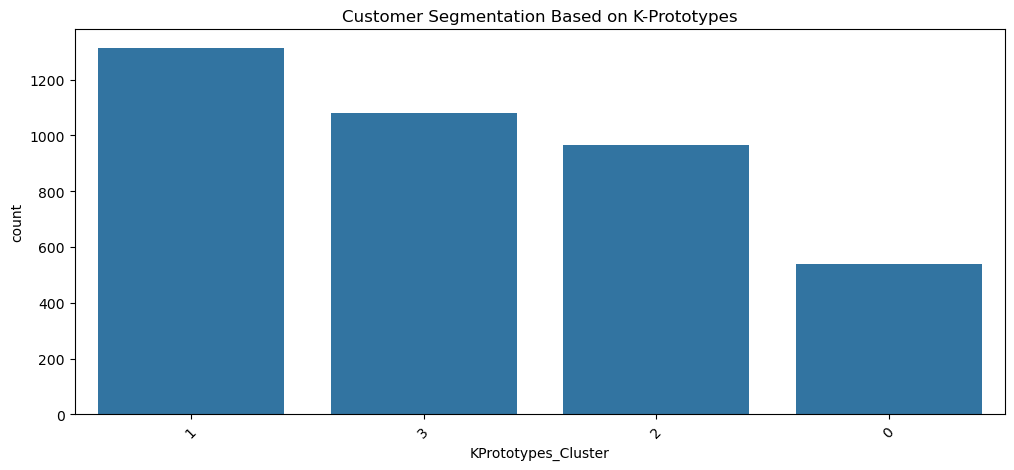

In [51]:
# Display a sample of cluster assignments
print(df[["Customer ID", "KPrototypes_Cluster"]].head())

# Cluster Summary
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(df.groupby("KPrototypes_Cluster")[numeric_columns].mean())

# Visualize K-Prototypes Segments
plt.figure(figsize=(12, 5))
sns.countplot(x="KPrototypes_Cluster", data=df, order=df["KPrototypes_Cluster"].value_counts().index)
plt.title("Customer Segmentation Based on K-Prototypes")
plt.xticks(rotation=45)
plt.show()

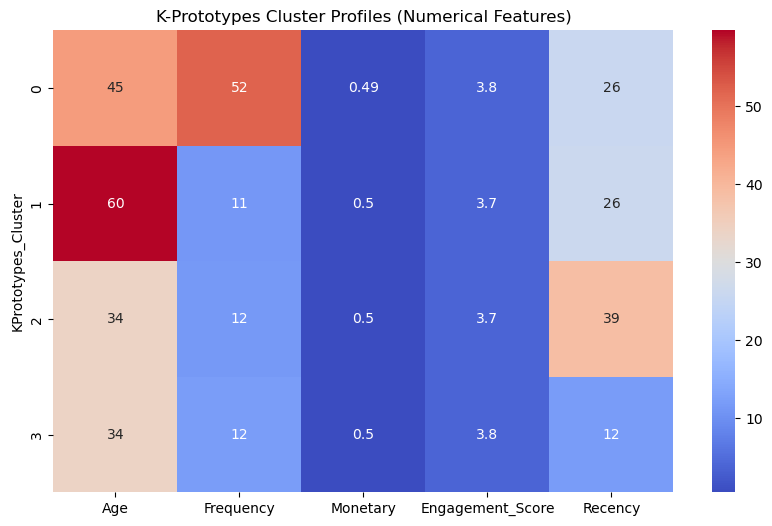

In [52]:
# Compute mean values for each cluster (Numerical Features)
cluster_means_kproto = df.groupby("KPrototypes_Cluster")[numerical_features].mean()

# Visualize using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_kproto, annot=True, cmap="coolwarm")
plt.title("K-Prototypes Cluster Profiles (Numerical Features)")
plt.show()

In [53]:
# Get mode (most frequent category) for categorical features in each cluster
cluster_modes_kproto = df.groupby("KPrototypes_Cluster")[categorical_features].agg(lambda x: x.mode()[0])

print("Most Common Categorical Values per Cluster:\n")
print(cluster_modes_kproto)

Most Common Categorical Values per Cluster:

                    Gender  Category Size   Color  Season Subscription Status  \
KPrototypes_Cluster                                                             
0                     male  Clothing    M  Yellow  Winter                  no   
1                     male  Clothing    M    Teal  Spring                  no   
2                     male  Clothing    M    Cyan  Summer                  no   
3                     male  Clothing    M  Yellow    Fall                  no   

                    Payment Method  
KPrototypes_Cluster                 
0                      Credit Card  
1                      Credit Card  
2                           PayPal  
3                           PayPal  


In [54]:
# K-Prototypes personas
kproto_personas = {
    0: "Luxury High-Spender (High frequency (52 purchases) and moderate monetary spend, suggesting they are engaged, frequent shoppers who make regular purchases.)",  
    1: "Infrequent High-Spender (Older age (avg. 59 years) with moderate spending but low frequency, indicating they buy less often but in higher amounts.)",  
    2: "Loyal Subscription Shopper (Moderate frequency, moderate spend, and steady engagement suggest customers who consistently purchase—likely through subscriptions or repeat orders.)",  
    3: "Moderate-Frequency Engaged Shopper (Lower recency (they have purchased more recently) and decent engagement, meaning they may shop semi-regularly but without strong spending patterns.)"
}

# Map personas to clusters
df["KPrototypes_Persona"] = df["KPrototypes_Cluster"].map(kproto_personas)

# Display persona summary
cluster_summary_kproto = df.groupby("KPrototypes_Cluster")[numerical_features].mean().reset_index()
cluster_summary_kproto["Persona"] = cluster_summary_kproto["KPrototypes_Cluster"].map(kproto_personas)
print("K-Prototypes Cluster Summary:\n", cluster_summary_kproto)

K-Prototypes Cluster Summary:
    KPrototypes_Cluster        Age  Frequency  Monetary  Engagement_Score  \
0                    0  44.649351  52.000000  0.487152          3.759555   
1                    1  59.706240  11.257991  0.498887          3.734018   
2                    2  33.881988  11.521739  0.500919          3.740062   
3                    3  33.873265  12.111933  0.496311          3.773358   

     Recency                                            Persona  
0  25.771800  Luxury High-Spender (High frequency (52 purcha...  
1  26.302892  Infrequent High-Spender (Older age (avg. 59 ye...  
2  38.807453  Loyal Subscription Shopper (Moderate frequency...  
3  11.961147  Moderate-Frequency Engaged Shopper (Lower rece...  


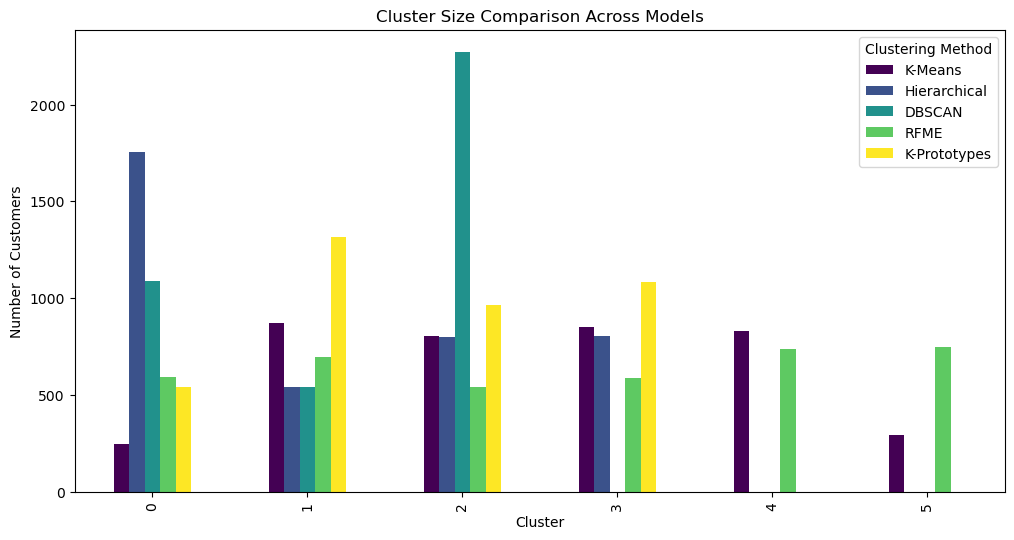

In [55]:
# Count cluster assignments for each method
cluster_counts = {
    "K-Means": df["KMeans_Cluster"].value_counts(),
    "Hierarchical": df["Hierarchical_Cluster"].value_counts(),
    "DBSCAN": df["DBSCAN_Cluster"].value_counts(),
    "RFME": df["RFME_Cluster"].value_counts(),
    "K-Prototypes": df["KPrototypes_Cluster"].value_counts()
}

# Convert to DataFrame for visualization
cluster_counts_df = pd.DataFrame(cluster_counts).fillna(0)

# Plot the comparison
cluster_counts_df.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Cluster Size Comparison Across Models")
plt.legend(title="Clustering Method")
plt.show()

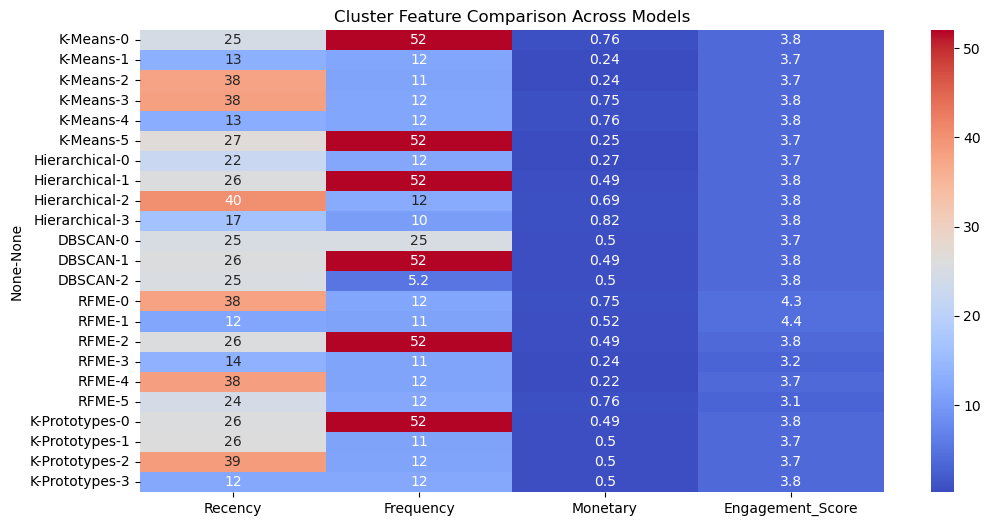

In [56]:
# Compute mean values for each method's cluster
cluster_means_combined = {
    "K-Means": df.groupby("KMeans_Cluster")[["Recency", "Frequency", "Monetary", "Engagement_Score"]].mean(),
    "Hierarchical": df.groupby("Hierarchical_Cluster")[["Recency", "Frequency", "Monetary", "Engagement_Score"]].mean(),
    "DBSCAN": df.groupby("DBSCAN_Cluster")[["Recency", "Frequency", "Monetary", "Engagement_Score"]].mean(),
    "RFME": df.groupby("RFME_Cluster")[["Recency", "Frequency", "Monetary", "Engagement_Score"]].mean(),
    "K-Prototypes": df.groupby("KPrototypes_Cluster")[["Recency", "Frequency", "Monetary", "Engagement_Score"]].mean()
}

# Convert to single DataFrame for heatmap
cluster_means_df = pd.concat(cluster_means_combined, axis=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means_df, annot=True, cmap="coolwarm")
plt.title("Cluster Feature Comparison Across Models")
plt.show()

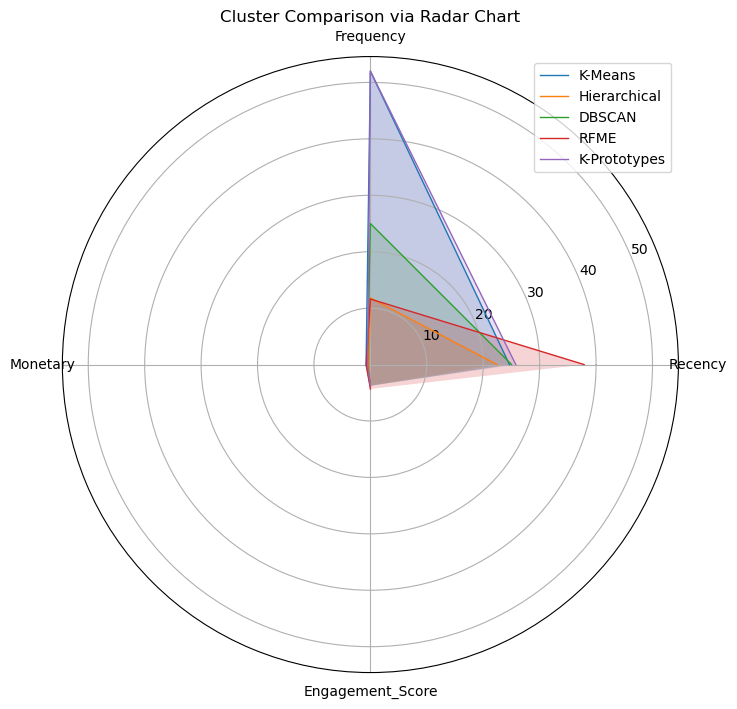

In [57]:
# Choose one cluster from each method for comparison
selected_clusters = {
    "K-Means": df[df["KMeans_Cluster"] == 0][["Recency", "Frequency", "Monetary", "Engagement_Score"]].mean(),
    "Hierarchical": df[df["Hierarchical_Cluster"] == 0][["Recency", "Frequency", "Monetary", "Engagement_Score"]].mean(),
    "DBSCAN": df[df["DBSCAN_Cluster"] == 0][["Recency", "Frequency", "Monetary", "Engagement_Score"]].mean(),
    "RFME": df[df["RFME_Cluster"] == 0][["Recency", "Frequency", "Monetary", "Engagement_Score"]].mean(),
    "K-Prototypes": df[df["KPrototypes_Cluster"] == 0][["Recency", "Frequency", "Monetary", "Engagement_Score"]].mean()
}

# Convert to DataFrame
selected_clusters_df = pd.DataFrame(selected_clusters).T

# Define number of variables
categories = list(selected_clusters_df.columns)
N = len(categories)

# Define radar chart properties
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each method's cluster
for method, values in selected_clusters_df.iterrows():
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=method)
    ax.fill(angles, values, alpha=0.2)

# Configure labels
ax.set_xticks(angles)
ax.set_xticklabels(categories)
plt.title("Cluster Comparison via Radar Chart")
plt.legend()
plt.show()

In [58]:
# Define personas for each clustering method
kmeans_personas = {
    0: "High-Value Loyal Customer",
    1: "Recent Engaged Shopper",
    2: "Frequent Low-Spender",
    3: "Infrequent Low-Spender",
    4: "Dormant High-Value Customer",
    5: "High-Frequency Premium Buyer"
}

hierarchical_personas = {
    0: "Premium Shopper",
    1: "Occasional Buyer",
    2: "At-Risk Customer",
    3: "High-Frequency Budget Shopper"
}

dbscan_personas = {
    -1: "Noise/Outliers",
    0: "Premium Loyalist",
    1: "High-Frequency Deal Seeker",
    2: "Low-Value Irregular Shopper",
    3: "Consistent Low-Spender",
    4: "Long-Term Bulk Buyer"
}

# Map personas to clusters
df["KMeans_Persona"] = df["KMeans_Cluster"].map(kmeans_personas)
df["Hierarchical_Persona"] = df["Hierarchical_Cluster"].map(hierarchical_personas)
df["DBSCAN_Persona"] = df["DBSCAN_Cluster"].map(dbscan_personas)

# Create a table comparing personas
persona_comparison = pd.DataFrame({
    "K-Means": df.groupby("KMeans_Cluster")["KMeans_Persona"].first(),
    "Hierarchical": df.groupby("Hierarchical_Cluster")["Hierarchical_Persona"].first(),
    "DBSCAN": df.groupby("DBSCAN_Cluster")["DBSCAN_Persona"].first(),
    "RFME": df.groupby("RFME_Cluster")["RFME_Persona"].first(),
    "K-Prototypes": df.groupby("KPrototypes_Cluster")["KPrototypes_Persona"].first(),
})

print(persona_comparison)

                        K-Means                   Hierarchical  \
0     High-Value Loyal Customer                Premium Shopper   
1        Recent Engaged Shopper               Occasional Buyer   
2          Frequent Low-Spender               At-Risk Customer   
3        Infrequent Low-Spender  High-Frequency Budget Shopper   
4   Dormant High-Value Customer                            NaN   
5  High-Frequency Premium Buyer                            NaN   

                        DBSCAN                          RFME  \
0             Premium Loyalist     High-Value Loyal Customer   
1   High-Frequency Deal Seeker        Recent Engaged Shopper   
2  Low-Value Irregular Shopper          Frequent Low-Spender   
3                          NaN        Infrequent Low-Spender   
4                          NaN   Dormant High-Value Customer   
5                          NaN  High-Frequency Premium Buyer   

                                        K-Prototypes  
0  Luxury High-Spender (High freq

# LLM + K-Means 

In [59]:
#%pip install sentence-transformers
#%pip install tf-keras

from sentence_transformers import SentenceTransformer

# Pre-trained language model
model = SentenceTransformer('all-MiniLM-L6-v2')

df['Category_Embedding'] = df['Category'].apply(lambda x: model.encode(str(x)))
df['Item_Purchased_Embedding'] = df['Item Purchased'].apply(lambda x: model.encode(str(x)))

# Convert embeddings to NumPy arrays
category_embeddings = np.vstack(df['Category_Embedding'].values)
item_purchased_embeddings = np.vstack(df['Item_Purchased_Embedding'].values)

# Reduce dimensionality using PCA
pca = PCA(n_components=20)  
category_embeddings_pca = pca.fit_transform(category_embeddings)
item_purchased_embeddings_pca = pca.fit_transform(item_purchased_embeddings)

# Concatenate PCA-reduced embeddings with numerical data
X_embeddings = np.hstack([df[numerical_features].values, category_embeddings_pca, item_purchased_embeddings_pca])

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['KMeans_LLM_Cluster'] = kmeans.fit_predict(X_embeddings)

In [60]:
#Silhouette Score for K-Means
silhouette_score_kmeans = silhouette_score(X_embeddings, df['KMeans_LLM_Cluster'])

# Final clustering results
clustering_results = {
    "Number of Clusters": 4,
    "Silhouette Score": silhouette_score_kmeans,
    "Total Features After PCA + Numerical Data": X_embeddings.shape[1]
}

# Convert results to DataFrame and display
clustering_results_df = pd.DataFrame([clustering_results])
print(clustering_results_df)

   Number of Clusters  Silhouette Score  \
0                   4           0.30687   

   Total Features After PCA + Numerical Data  
0                                         45  


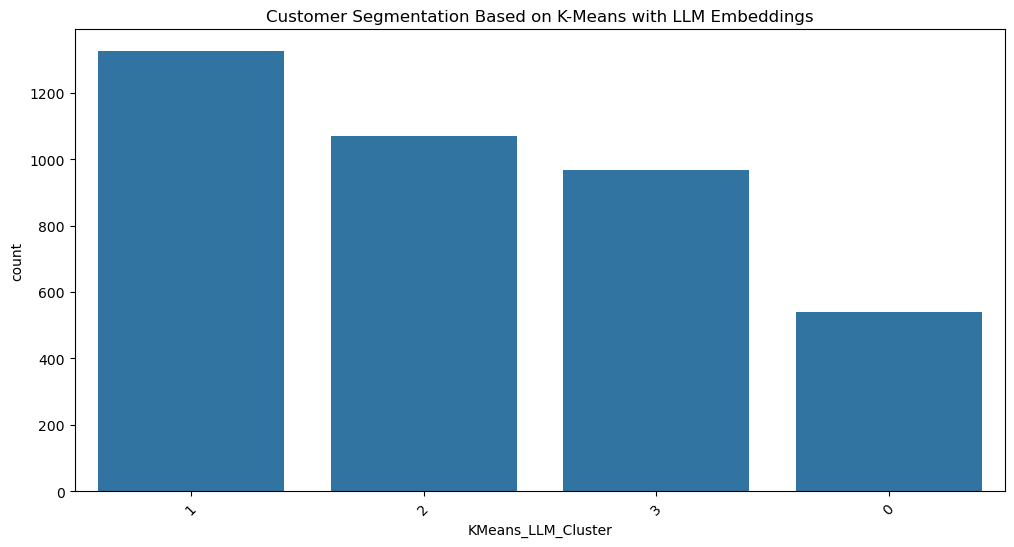

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(x="KMeans_LLM_Cluster", data=df, order=df["KMeans_LLM_Cluster"].value_counts().index)
plt.title("Customer Segmentation Based on K-Means with LLM Embeddings")
plt.xticks(rotation=45)
plt.show()

                          Age  Frequency  Monetary  Engagement_Score  \
KMeans_LLM_Cluster                                                     
0                   44.649351  52.000000  0.487152          3.759555   
1                   59.643505  11.259063  0.498376          3.736631   
2                   34.187850  12.215888  0.496016          3.762523   
3                   33.352637  11.414685  0.501913          3.748914   

                      Recency  
KMeans_LLM_Cluster             
0                   25.771800  
1                   26.591390  
2                   11.737383  
3                   38.483971  


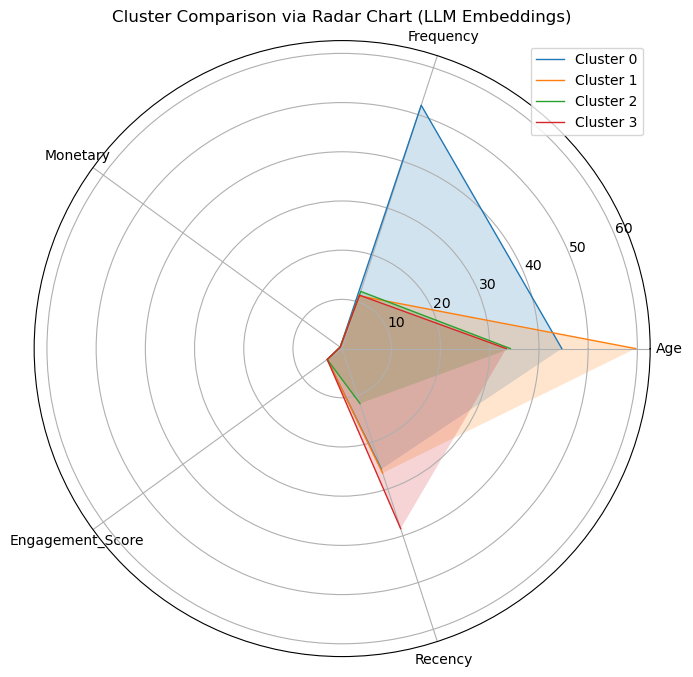

In [62]:
# Define clusters & metrics
cluster_means_llm = df.groupby("KMeans_LLM_Cluster")[numerical_features].mean()
print(cluster_means_llm)

# Number of variables
categories = list(cluster_means_llm.columns)
N = len(categories)

# Convert to radar chart format
values = cluster_means_llm.values
cluster_names = [f'Cluster {i}' for i in range(len(cluster_means_llm))]
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Plot Radar Chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i in range(len(values)):
    ax.plot(angles, values[i], linewidth=1, linestyle='solid', label=cluster_names[i])
    ax.fill(angles, values[i], alpha=0.2)

# Configure labels
ax.set_xticks(angles)
ax.set_xticklabels(categories)
plt.title("Cluster Comparison via Radar Chart (LLM Embeddings)")
plt.legend()

plt.show()

In [63]:
from sentence_transformers import SentenceTransformer

# Sentence embedding model 
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Categorical/text columns to convert into embeddings
text_columns = ["Category", "Subscription Status", "Payment Method"]

# Categorical values into embeddings
def encode_text_features(df, columns):
    text_data = df[columns].astype(str).agg(" ".join, axis=1)  # Concatenate selected text features
    embeddings = embedder.encode(text_data, convert_to_numpy=True)  # Generate text embeddings
    return embeddings

# Text embeddings
text_embeddings = encode_text_features(df, text_columns)

# Stack with numerical features for clustering
numerical_features = ["Recency", "Frequency", "Monetary", "Engagement_Score"]
X_combined = np.hstack((df[numerical_features].values, text_embeddings))

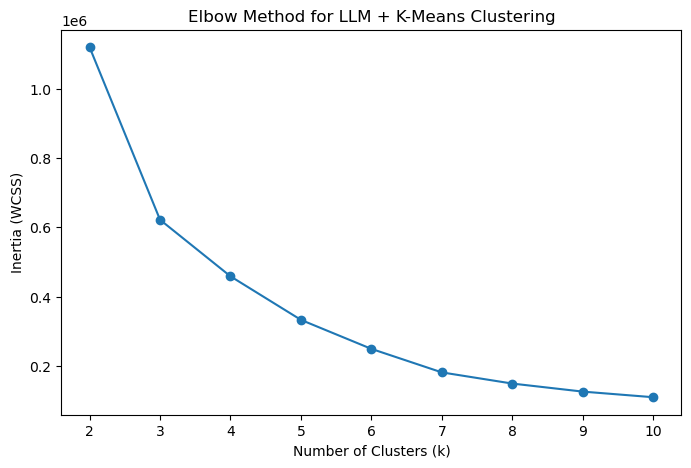

Silhouette Score (LLM + K-Means): 0.4544503663566674
Davies-Bouldin Index (LLM + K-Means): 0.7822053369796621


In [64]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Determine the optimal number of clusters (Elbow Method)
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_combined)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for LLM + K-Means Clustering")
plt.show()

# Choose optimal number of clusters
optimal_k_llm = 4  # Adjust based on elbow method

# Apply K-Means with chosen k
kmeans_llm = KMeans(n_clusters=optimal_k_llm, random_state=42, n_init=10)
df["LLM_KMeans_Cluster"] = kmeans_llm.fit_predict(X_combined)

# Evaluate clustering quality
silhouette_llm = silhouette_score(X_combined, df["LLM_KMeans_Cluster"])
davies_bouldin_llm = davies_bouldin_score(X_combined, df["LLM_KMeans_Cluster"])

# Display evaluation results
print("Silhouette Score (LLM + K-Means):", silhouette_llm)
print("Davies-Bouldin Index (LLM + K-Means):", davies_bouldin_llm)

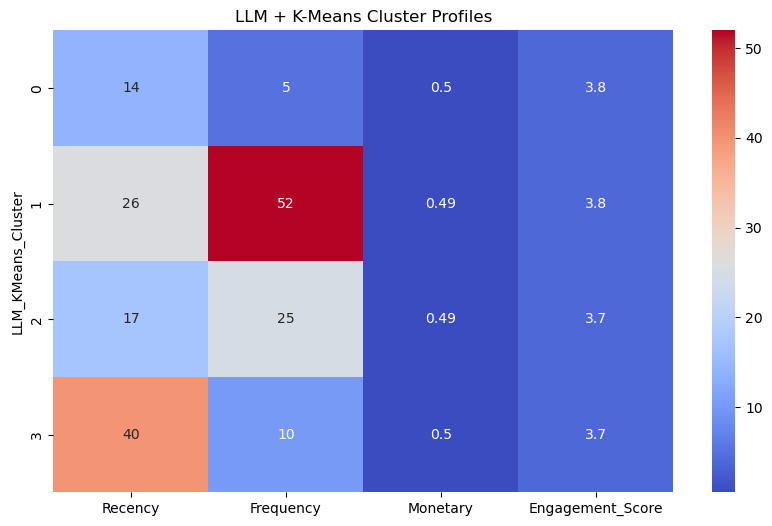

In [65]:
# Compute mean values for numerical features per cluster
cluster_means_llm = df.groupby("LLM_KMeans_Cluster")[numerical_features].mean()

# Heatmap of cluster profiles
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_llm, annot=True, cmap="coolwarm")
plt.title("LLM + K-Means Cluster Profiles")
plt.show()

In [66]:
# Get mode of text features for each cluster
cluster_text_modes = df.groupby("LLM_KMeans_Cluster")[text_columns].agg(lambda x: x.mode()[0])
print(cluster_text_modes)

                    Category Subscription Status Payment Method
LLM_KMeans_Cluster                                             
0                   Clothing                  no         PayPal
1                   Clothing                  no    Credit Card
2                   Clothing                  no           Cash
3                   Clothing                  no         PayPal


In [67]:
# Define LLM-based personas
llm_personas = {
    0: "Loyal Mid-Value Shopper (Low recency (recent purchases), moderate frequency, and moderate monetary spend. These customers are engaged and buy consistently but are not necessarily high spenders.)",
    1: "Super-Frequent Budget Shopper (Highest frequency (52 purchases) but lower monetary spend. These are power shoppers who make many small transactions, likely looking for deals or daily essentials.)",
    2: "Steady Mid-Spender (Mid-range frequency (25 purchases) and moderate spend, suggesting a balanced shopping behavior with steady purchasing patterns.)",
    3: "Occasional High-Value Buyer (Highest recency (long time since last purchase) but the highest monetary spend per transaction. These customers buy infrequently but spend significantly when they do.)"
}

# Assign personas
df["LLM_KMeans_Persona"] = df["LLM_KMeans_Cluster"].map(llm_personas)

# Display persona breakdown
persona_summary = df.groupby("LLM_KMeans_Cluster")[numerical_features].mean().reset_index()
persona_summary["Persona"] = persona_summary["LLM_KMeans_Cluster"].map(llm_personas)
print(persona_summary)

   LLM_KMeans_Cluster    Recency  Frequency  Monetary  Engagement_Score  \
0                   0  14.058918   5.017756  0.496893          3.766182   
1                   1  25.771800  52.000000  0.487152          3.759555   
2                   2  16.989189  25.000000  0.493057          3.725811   
3                   3  39.789436  10.346599  0.503202          3.744573   

                                             Persona  
0  Loyal Mid-Value Shopper (Low recency (recent p...  
1  Super-Frequent Budget Shopper (Highest frequen...  
2  Steady Mid-Spender (Mid-range frequency (25 pu...  
3  Occasional High-Value Buyer (Highest recency (...  


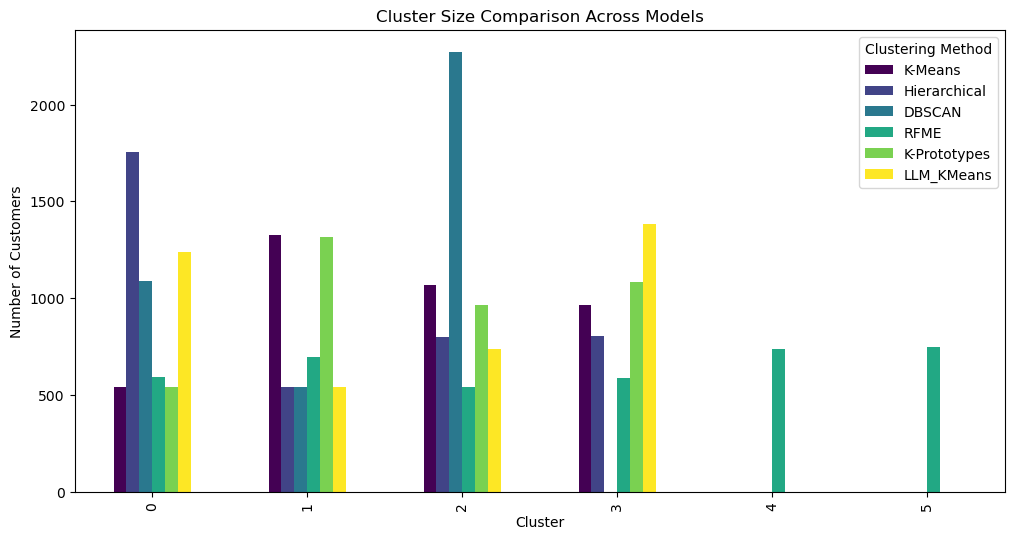

In [68]:
# Summary of all models
cluster_counts = {
    "K-Means": df["KMeans_LLM_Cluster"].value_counts(),
    "Hierarchical": df["Hierarchical_Cluster"].value_counts(),
    "DBSCAN": df["DBSCAN_Cluster"].value_counts(),
    "RFME": df["RFME_Cluster"].value_counts(),
    "K-Prototypes": df["KPrototypes_Cluster"].value_counts(),
    "LLM_KMeans": df["LLM_KMeans_Cluster"].value_counts()
}

# Convert to DataFrame for visualization
cluster_counts_df = pd.DataFrame(cluster_counts).fillna(0)

# Plot the comparison
plt.figure(figsize=(12, 6))
cluster_counts_df.plot(kind="bar", colormap="viridis", ax=plt.gca())
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Cluster Size Comparison Across Models")
plt.legend(title="Clustering Method")
plt.show()

# Compute mean values for each method's cluster
cluster_means_combined = {
    "K-Means": df.groupby("KMeans_LLM_Cluster")[numerical_features].mean(),
    "Hierarchical": df.groupby("Hierarchical_Cluster")[numerical_features].mean(),
    "DBSCAN": df.groupby("DBSCAN_Cluster")[numerical_features].mean(),
    "RFME": df.groupby("RFME_Cluster")[numerical_features].mean(),
    "K-Prototypes": df.groupby("KPrototypes_Cluster")[numerical_features].mean(),
    "LLM_KMeans": df.groupby("LLM_KMeans_Cluster")[numerical_features].mean()
}

In [69]:
# Calculate silhouette score for K-Prototypes
from sklearn.metrics import silhouette_score

# Convert categorical columns to numerical for silhouette score calculation
categorical_features = ['Gender', 'Category', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method']
df[categorical_features] = df[categorical_features].astype('category').apply(lambda x: x.cat.codes)

# Prepare data for silhouette score calculation
X_kproto = df[numerical_features + categorical_features].values

# Calculate silhouette score for K-Prototypes
silhouette_kproto = silhouette_score(X_kproto, df["KPrototypes_Cluster"])

# Silhouette Score for all models
silhouette_scores = {
    "K-Means": silhouette_score(X_embeddings, df["KMeans_LLM_Cluster"]),
    "Hierarchical": silhouette_score(X_embeddings, df["Hierarchical_Cluster"]),
    "DBSCAN": silhouette_dbscan,
    "RFME": silhouette_rfme,
    "K-Prototypes": silhouette_kproto,
    "LLM_KMeans": silhouette_llm
}

#Table of Silhouette Scores
silhouette_scores_df = pd.DataFrame(silhouette_scores, index=["Silhouette Score"])
print(silhouette_scores_df)

                  K-Means  Hierarchical    DBSCAN      RFME  K-Prototypes  \
Silhouette Score  0.30687      0.061692  0.192412  0.224612      0.127215   

                  LLM_KMeans  
Silhouette Score     0.45445  
